In [69]:
import nltk
import sys
from nltk.collocations import *
import pandas as pd  
from collections import Counter
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.util import ngrams
import numpy as np
import re
from nltk.corpus import stopwords, wordnet
import time
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import nltk.corpus  
from nltk.text import Text  
from nltk.collocations import BigramCollocationFinder 
from nltk.metrics import BigramAssocMeasures
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
# spacy for lemmatization
import spacy

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel




from nltk.tokenize import sent_tokenize, word_tokenize
from numpy.testing import rundocs

from pprint import pprint


# Gensim
import gensim
from gensim.models import Word2Vec 

from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD

from sklearn.decomposition import PCA
from matplotlib import pyplot



In [3]:
df = pd.read_csv('C:/tuli/export_dataframe.csv', encoding='cp1252')


In [4]:
df.columns = ['twts']

In [6]:
df.shape

(7301, 1)

In [7]:
df.columns

Index(['twts'], dtype='object')

In [8]:
def preprocessing_initial_text_clean(p_df, p_text):

     # convert to string:
    #p_df = p_df.apply(p_df.to_string) # convert all columns of DataFrame

     # convert to string:

    p_df = p_df.astype(str)
    
    # remove punctuation

    p_df[p_text] = p_df[p_text].str.replace(r"[^\w\s]", "")

    # remove underscores not picked up as punctuation above

    p_df[p_text] = p_df[p_text].str.replace("_", " ")

    p_df[p_text] = p_df[p_text].str.replace("#", " ")
    # remove  numbers

    p_df[p_text] = p_df[p_text].str.replace(r"\d[,9][^19]", "")

    # lowercase

    p_df[p_text] = p_df[p_text].apply(lambda x: " ".join(x.lower() for x in x.split()))
    
    
    stop = stopwords.words("english")

    p_df[p_text] = p_df[p_text].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
    
    return p_df

In [9]:
df = preprocessing_initial_text_clean(df, 'twts')

In [10]:
alltext = list(df['twts'])

In [11]:
print (alltext[1:5])

['someone actually admires masisihis judgement travel non essentially namibia critical time even though zero covidve cases botswana knowing full well theres uneasiness amp border controli botswana citizen expected better covidcoronavirus', 'president botswana placed isolation trip namibia weekend mr mnangagwa zimbabwe coronavirus', 'botswana president coronavirus selfisolation namibia trip httpswwwafricanewscom20200322botswanapresidentinselfisolationafternamibiatrip cc magufulijp', 'update botswana director health services puts countrys president mokgweetsi masisi isolation 14 days trip namibia measure contain spread coronavirus covid19']


In [12]:

ngram = []
tokens = []
for line in alltext:
    token = nltk.word_tokenize(line)
    tokens.extend(token)
    ngram.extend(list(ngrams(token, 2)))
counts = Counter(ngram)
print(counts.most_common())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: generator 'ngrams' raised StopIteration
  import sys


[(('working', 'home'), 789), (('national', 'lockdown'), 577), (('social', 'services'), 237), (('ministry', 'health'), 198), (('health', 'social'), 168), (('cases', 'coronavirus'), 165), (('corona', 'virus'), 158), (('two', 'cases'), 117), (('windhoek', 'namibia'), 108), (('first', 'two'), 107), (('namibia', 'reports'), 89), (('reports', 'first'), 89), (('coronavirus', 'cases'), 83), (('south', 'africa'), 80), (('travel', 'ban'), 76), (('tested', 'positive'), 76), (('stay', 'home'), 72), (('coronavirus', 'namibia'), 69), (('national', 'guard'), 68), (('gon', 'na'), 67), (('social', 'distancing'), 67), (('im', 'working'), 64), (('first', 'cases'), 56), (('casos', 'de'), 55), (('work', 'home'), 54), (('national', 'lock'), 53), (('imposes', 'travel'), 52), (('coronavirus', 'imposes'), 50), (('windhoek', 'draught'), 49), (('need', 'national'), 47), (('stay', 'safe'), 44), (('de', 'coronavirus'), 41), (('confirmed', 'cases'), 41), (('defeat', 'coronavirus'), 41), (('quarantine', 'day'), 39),

In [13]:
bigrams = nltk.collocations.BigramAssocMeasures()
trigrams = nltk.collocations.TrigramAssocMeasures()
bigramFinder = nltk.collocations.BigramCollocationFinder.from_words(tokens)
trigramFinder = nltk.collocations.TrigramCollocationFinder.from_words(tokens)

In [14]:
#bigrams
bigram_freq = bigramFinder.ngram_fd.items()
bigramFreqTable = pd.DataFrame(list(bigram_freq), columns=['bigram','freq']).sort_values(by='freq', ascending=False)
#trigrams
trigram_freq = trigramFinder.ngram_fd.items()
trigramFreqTable = pd.DataFrame(list(trigram_freq), columns=['trigram','freq']).sort_values(by='freq', ascending=False)

In [105]:
print(bigramFreqTable)

                                                  bigram  freq
6187                                     (working, home)   789
36896                               (national, lockdown)   577
344                                   (social, services)   237
342                                   (ministry, health)   198
343                                     (health, social)   168
412                                 (cases, coronavirus)   165
312                                      (corona, virus)   158
3695                                        (two, cases)   117
4204                                 (windhoek, namibia)   110
3694                                        (first, two)   107
349                               (coronavirus, namibia)    91
3693                                    (reports, first)    89
2733                                  (namibia, reports)    89
1786                                (coronavirus, cases)    83
240                                      (south, africa

In [15]:
print(trigramFreqTable)

                                                 trigram  freq
381                           (health, social, services)   165
380                           (ministry, health, social)   157
4132                           (two, cases, coronavirus)   105
4131                                 (first, two, cases)   102
4129                           (namibia, reports, first)    84
4130                               (reports, first, two)    84
85767                                (im, working, home)    53
4135                              (imposes, travel, ban)    52
4133                       (cases, coronavirus, imposes)    50
4134                      (coronavirus, imposes, travel)    50
71243                         (need, national, lockdown)    40
72537                     (fiveweek, national, lockdown)    35
72539                    (lockdown, defeat, coronavirus)    33
72538                       (national, lockdown, defeat)    33
4165                            (casos, de, coronavirus

In [16]:
#filter for only those with more than 20 occurences
bigramFinder.apply_freq_filter(20)
trigramFinder.apply_freq_filter(20)
bigramPMITable = pd.DataFrame(list(bigramFinder.score_ngrams(bigrams.pmi)), columns=['bigram','PMI']).sort_values(by='PMI', ascending=False)
trigramPMITable = pd.DataFrame(list(trigramFinder.score_ngrams(trigrams.pmi)), columns=['trigram','PMI']).sort_values(by='PMI', ascending=False)

In [17]:
print(bigramPMITable)

                                                bigram        PMI
0                                      (cote, divoire)  12.299065
1                                           (can, not)  12.234935
2                                       (amici, siamo)  12.058057
3                                        (cari, amici)  12.058057
4                         (voi, covidwestandwithitaly)  12.003609
5                                      (burkina, faso)  11.949161
6                                  (kalumbi, shangula)  11.436568
7                                   (blames, internet)  11.366179
8                                         (rand, paul)  11.299065
9                                         (chad, wolf)  11.159936
10                                   (secretary, chad)  11.121622
11                               (immediate, fiveweek)  10.987667
12                                     (hage, geingob)  10.795022
13                                  (internet, rumors)  10.760458
14        

In [18]:
print(trigramPMITable)

                                              trigram        PMI
0                                (cari, amici, siamo)  24.116114
1                          (blames, internet, rumors)  22.995393
2                             (secretary, chad, wolf)  22.419473
3                                 (amici, siamo, con)  22.340820
4                   (con, voi, covidwestandwithitaly)  22.286372
5                                   (siamo, con, voi)  22.286372
6                              (dhs, secretary, chad)  22.129053
7                               (family, cari, amici)  22.099812
8                           (chad, wolf, considering)  22.040049
9                            (acting, dhs, secretary)  21.988190
10  (april, video, httpswwwthegatewaypunditcom2020...  21.884907
11                     (italian, friends, colleagues)  21.807909
12  (httpswwwthegatewaypunditcom202003actingdhssec...  21.493585
13                      (minister, kalumbi, shangula)  21.173662
14                       

In [19]:
text = nltk.Text(tokens)

In [20]:
type(text)

nltk.text.Text

In [21]:
text.collocations()

working home; national lockdown; social services; ministry health;
corona virus; health social; travel ban; reports first; two cases;
first two; south africa; tested positive; cases coronavirus; social
distancing; imposes travel; namibia reports; kalumbi shangula;
national guard; hage geingob; chad wolf


In [36]:
text.concordance("namibia")

Displaying 25 of 1288 matches:
mauritius seychelles tanzania congo namibia togo zimbabwe zambia guinea benin l
is judgement travel non essentially namibia critical time even though zero covi
dent botswana placed isolation trip namibia weekend mr mnangagwa zimbabwe coron
president coronavirus selfisolation namibia trip httpswwwafricanewscom20200322b
eetsi masisi isolation 14 days trip namibia measure contain spread coronavirus 
wing trip hage geingob inauguration namibia yesterday botswana president corona
president coronavirus selfisolation namibia trip httpsbitly2wcp4le botswana pre
president coronavirus selfisolation namibia trip httpsgobnewsonlinecom20200322b
president coronavirus selfisolation namibia trip httpsgobnewsonlinecom20200322b
president coronavirus selfisolation namibia trip httpsgobnewsonlinecom20200322b
president coronavirus selfisolation namibia trip httpdlvritrsmsfc botswanas pre
der selfisolate precaution visiting namibia case undiscovered local transmissio
us case v

In [22]:
# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25)

# apply transformation
tf = vectorizer.fit_transform(df['twts']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

number_of_topics = 10

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)
model.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [23]:
type(tf)

numpy.ndarray

In [24]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

In [26]:
no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 weights,Topic 0 words,Topic 1 weights,Topic 1 words,Topic 2 weights,Topic 2 words,Topic 3 weights,Topic 3 words,Topic 4 weights,Topic 4 words,Topic 5 weights,Topic 5 words,Topic 6 weights,Topic 6 words,Topic 7 weights,Topic 7 words,Topic 8 weights,Topic 8 words,Topic 9 weights,Topic 9 words
0,686.3,coronavirus,1164.1,home,875.1,windhoek,867.6,quarantine,545.1,de,121.8,amp,906.9,national,514.1,health,312.2,covid,202.0,people
1,522.6,namibia,1006.1,working,585.2,namibia,249.4,day,289.1,en,93.8,last,857.1,lockdown,321.7,social,261.4,coronavirus,166.4,one
2,382.8,cases,347.0,im,244.6,coronavirus,142.4,need,210.1,la,88.3,world,133.1,people,291.1,services,213.6,virus,157.5,know
3,309.2,first,247.5,work,180.8,africa,126.0,get,205.1,el,77.9,us,126.7,lock,286.1,ministry,182.7,corona,152.8,dont
4,244.5,two,138.6,stay,136.3,president,124.4,people,196.1,que,74.7,via,115.3,need,94.9,confirmed,127.6,pandemic,138.0,windhoek
5,134.1,travel,119.5,week,119.1,south,124.3,like,155.1,coronavirus,70.7,says,103.1,state,92.0,mohss,96.0,cdc,137.2,would
6,108.1,reports,113.6,time,109.8,virus,105.2,going,113.1,casos,64.3,could,81.9,us,76.1,namibia,88.4,china,108.6,test
7,104.3,covid19,100.5,make,84.1,corona,91.3,go,106.5,un,63.3,distancing,77.0,states,64.1,public,72.1,coronaviruspandemic,95.2,amp
8,91.1,ban,98.0,tomorrow,80.0,rwanda,74.7,lockdown,97.0,namibia,63.1,video,74.7,trump,62.8,friends,72.0,outbreak,83.1,like
9,81.5,new,92.2,still,76.9,zimbabwe,74.5,nationallockdown,91.1,por,60.2,quarantine,71.9,guard,61.2,support,70.1,trump,78.0,die


In [27]:
import pyLDAvis.sklearn
 
pyLDAvis.enable_notebook()

panel = pyLDAvis.sklearn.prepare(model, np.matrix(tf), vectorizer, mds='tsne')
panel
 

PreparedData(topic_coordinates=            Freq  cluster  topics           x           y
topic                                                    
1      15.734685        1       1 -171.777191  288.096649
6      12.751666        1       2  303.271790   64.025162
9      12.012793        1       3    0.538455 -120.559891
2      10.157619        1       4  -77.272804   86.468666
3       9.919435        1       5  219.812378  264.953247
7       8.604936        1       6 -194.895874 -102.540329
8       8.080990        1       7  196.733109 -125.688225
4       8.044185        1       8   24.390635  282.849518
0       7.897375        1       9 -278.334839   98.406952
5       6.796317        1      10  102.204620   75.864281, topic_info=     Category         Freq         Term        Total  loglift  logprob
term                                                                  
257   Default  1104.000000         home  1104.000000  30.0000  30.0000
615   Default   978.000000     windhoek   978.000000  29.0000  29.0000
622   Default   954.000000      working   954.000000  28.0000  28.0000
443   Default   969.000000   quarantine   969.000000  27.0000  27.0000
373   Default  1294.000000      namibia  1294.000000  26.0000  26.0000
114   Default  1474.000000  coronavirus  1474.000000  25.0000  25.0000
378   Default   994.000000     national   994.000000  24.0000  24.0000
328   Default   961.000000     lockdown   961.000000  23.0000  23.0000
140   Default   553.000000           de   553.000000  22.0000  22.0000
249   Default   519.000000       health   519.000000  21.0000  21.0000
78    Default   499.000000        cases   499.000000  20.0000  20.0000
197   Default   329.000000        first   329.000000  19.0000  19.0000
123   Default   385.000000        covid   385.000000  18.0000  18.0000
505   Default   387.000000       social   387.000000  17.0000  17.0000
173   Default   293.000000           en   293.000000  16.0000  16.0000
490   Default   291.000000     services   291.000000  15.0000  15.0000
361   Default   286.000000     ministry   286.000000  14.0000  14.0000
582   Default   257.000000          two   257.000000  13.0000  13.0000
298   Default   213.000000           la   213.000000  12.0000  12.0000
170   Default   208.000000           el   208.000000  11.0000  11.0000
138   Default   329.000000          day   329.000000  10.0000  10.0000
113   Default   269.000000       corona   269.000000   9.0000   9.0000
445   Default   199.000000          que   199.000000   8.0000   8.0000
597   Default   391.000000        virus   391.000000   7.0000   7.0000
267   Default   463.000000           im   463.000000   6.0000   6.0000
21    Default   176.000000       africa   176.000000   5.0000   5.0000
620   Default   259.000000         work   259.000000   4.0000   4.0000
574   Default   141.000000       travel   141.000000   3.0000   3.0000
36    Default   339.000000          amp   339.000000   2.0000   2.0000
418   Default   545.000000       people   545.000000   1.0000   1.0000
...       ...          ...          ...          ...      ...      ...
317   Topic10    31.480168         line    32.371710   2.6609  -4.7370
130   Topic10    34.534234     covidwho    38.452415   2.5813  -4.6444
241   Topic10    25.593854         hair    29.925637   2.5324  -4.9440
157   Topic10    66.220263   distancing    78.145884   2.5232  -3.9934
389   Topic10    29.294562        night    35.029848   2.5100  -4.8090
42    Topic10    40.561412        april    49.125693   2.4972  -4.4836
621   Topic10    42.710124      workers    52.384166   2.4846  -4.4319
530   Topic10    22.912148     students    28.857816   2.4581  -5.0547
302   Topic10    40.435154         late    52.629269   2.4252  -4.4867
632   Topic10    53.460574        years    69.877268   2.4210  -4.2074
301   Topic10    98.121383         last   133.096347   2.3839  -3.6002
53    Topic10    24.088446        based    34.731850   2.3229  -5.0047
449   Topic10    39.527633         real    57.884801   2.3073  -4.

In [28]:
import pandas as pd
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, LabelSet
output_notebook()

Loading BokehJS ...

In [29]:
df.shape

(7301, 1)

In [ ]:
#Let’s plot documents in 2D:

In [30]:
svd = TruncatedSVD(n_components=2)
documents_2d = svd.fit_transform(tf)
 
df1 = pd.DataFrame(columns=['x', 'y', 'document'])
df1['x'], df1['y'], df1['document'] = documents_2d[:,0], documents_2d[:,1], range(len(df['twts']))
 
source = ColumnDataSource(ColumnDataSource.from_df(df1))
labels = LabelSet(x="x", y="y", text="document", y_offset=8,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
 
plot = figure(plot_width=600, plot_height=600)
plot.circle("x", "y", size=12, source=source, line_color="black", fill_alpha=0.8)
plot.add_layout(labels)
show(plot, notebook_handle=True)

C:\ProgramData\Anaconda3\lib\site-packages\bokeh\embed\standalone.py:326: DeprecationWarning: invalid escape sequence \(
  child = re.search('\((.*)\)', str(e)).group(0)


In [ ]:
#To display words in 2D we just need to transpose the vectorized data: words_2d = svd.fit_transform(data_vectorized.T).

In [31]:
svd = TruncatedSVD(n_components=2)
words_2d = svd.fit_transform(tf.T)
 
df1 = pd.DataFrame(columns=['x', 'y', 'word'])
df1['x'], df1['y'], df1['word'] = words_2d[:,0], words_2d[:,1], vectorizer.get_feature_names()
 
source = ColumnDataSource(ColumnDataSource.from_df(df1))
labels = LabelSet(x="x", y="y", text="word", y_offset=8,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
 
plot = figure(plot_width=600, plot_height=600)
plot.circle("x", "y", size=12, source=source, line_color="black", fill_alpha=0.8)
plot.add_layout(labels)
show(plot, notebook_handle=True)
 

In [ ]:
#use gensim

In [32]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(alltext))

print(data_words[:1])

[['coronavirus', 'cases', 'amp', 'deaths', 'subsaharan', 'africa', 'southafrica', 'cotedivoire', 'senegal', 'burkinafaso', 'cameroon', 'nigeria', 'rwanda', 'ghana', 'ethiopia', 'kenya', 'mauritius', 'seychelles', 'tanzania', 'congo', 'namibia', 'togo', 'zimbabwe', 'zambia', 'guinea', 'benin', 'liberia']]


In [33]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['coronavirus', 'cases', 'amp', 'deaths', 'subsaharan', 'africa', 'southafrica', 'cotedivoire', 'senegal', 'burkinafaso', 'cameroon', 'nigeria', 'rwanda', 'ghana_ethiopia', 'kenya', 'mauritius', 'seychelles', 'tanzania', 'congo', 'namibia', 'togo', 'zimbabwe', 'zambia', 'guinea', 'benin_liberia']


In [36]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [37]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['case', 'death']]


In [38]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1)]]


In [39]:
a=[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

In [40]:
print (a)

[[('case', 1), ('death', 1)]]


In [41]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [42]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.182*"case" + 0.036*"hit" + 0.014*"confirm" + 0.000*"lockdown" + '
  '0.000*"national" + 0.000*"be" + 0.000*"new" + 0.000*"can" + 0.000*"ill" + '
  '0.000*"lock"'),
 (1,
  '0.165*"s" + 0.152*"know" + 0.104*"many" + 0.061*"well" + 0.057*"actually" + '
  '0.056*"long" + 0.029*"instead" + 0.027*"avoid" + 0.021*"there" + '
  '0.019*"area"'),
 (2,
  '0.192*"use" + 0.078*"allow" + 0.058*"realdonaldtrump" + 0.048*"weekend" + '
  '0.028*"travel" + 0.000*"lockdown" + 0.000*"national" + 0.000*"be" + '
  '0.000*"would" + 0.000*"have"'),
 (3,
  '0.385*"still" + 0.064*"issue" + 0.043*"announce" + 0.041*"cause" + '
  '0.021*"believe" + 0.018*"outbreak" + 0.007*"deadly" + 0.006*"suffer" + '
  '0.003*"fund" + 0.002*"concern"'),
 (4,
  '0.192*"really" + 0.138*"put" + 0.113*"stop" + 0.039*"declare" + '
  '0.039*"emergency" + 0.018*"vote" + 0.018*"response" + 0.011*"apparently" + '
  '0.000*"lockdown" + 0.000*"national"'),
 (5,
  '0.391*"go" + 0.258*"need" + 0.048*"first" + 0.039*"country" + 0.0

In [43]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -20.771347959899636

Coherence Score:  0.3260039559014378


In [44]:
print(len(df['twts']))

7301


In [ ]:
##mallet

In [45]:
# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
mallet_path = 'C:/tuli/mallet-2.0.8/bin/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=60, id2word=id2word)

In [46]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(10,
  [('happen', 0.07664233576642336),
   ('listen', 0.04866180048661801),
   ('action', 0.04744525547445255),
   ('risk', 0.0413625304136253),
   ('economy', 0.0364963503649635),
   ('continue', 0.032846715328467155),
   ('leader', 0.032846715328467155),
   ('decide', 0.032846715328467155),
   ('longer', 0.027980535279805353),
   ('long', 0.024330900243309004)]),
 (36,
  [('stay', 0.21580188679245282),
   ('home', 0.12028301886792453),
   ('order', 0.07311320754716981),
   ('leave', 0.06367924528301887),
   ('house', 0.04009433962264151),
   ('stay_safe', 0.027122641509433963),
   ('side', 0.025943396226415096),
   ('force', 0.025943396226415096),
   ('pretty', 0.02240566037735849),
   ('healthy', 0.02240566037735849)]),
 (30,
  [('lockdown', 0.3914002205071665),
   ('national', 0.32083792723263505),
   ('enforce', 0.02866593164277839),
   ('effect', 0.014332965821389196),
   ('delay', 0.011025358324145534),
   ('politic', 0.004410143329658214),
   ('inevitable', 0.0044101433296582

In [ ]:
### word embeddings

In [64]:

    
alltext2 = [x.split(" ")  for x in alltext]
    

In [66]:
len(alltext2)

7301

In [67]:
model1 = gensim.models.Word2Vec(alltext2, min_count = 5,  
                              size = 100, window = 5) 

In [55]:
type(model1)

gensim.models.word2vec.Word2Vec

In [56]:
print (model1)

Word2Vec(vocab=56, size=100, alpha=0.025)


In [68]:
print("Cosine similarity between 'alice' " + 
               "and 'wonderland' - CBOW : ", 
    model1.similarity('covid', 'coronavirus')) 

Cosine similarity between 'alice' and 'wonderland' - CBOW :  0.9678719


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


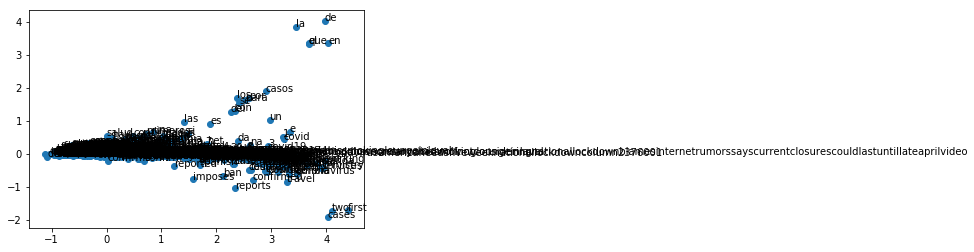

In [71]:
X = model1[model1.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model1.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()